In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [4]:
print("✅ Data loaded successfully!")
print(df.info())

✅ Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  T

In [5]:
print("\n🔹 First 5 rows:")
display(df.head())

print("\n🔹 Shape of data:", df.shape)
print("\n🔹 Missing values per column:")
print(df.isnull().sum())


🔹 First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN



🔹 Shape of data: (525600, 19)

🔹 Missing values per column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
df = df.dropna(axis=1, how='all')

# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\n✅ Missing values handled.")


✅ Missing values handled.


In [7]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outliers = (z_scores > 3)
outlier_counts = outliers.sum()

print("\n🔹 Outlier count per column:")
print(outlier_counts)


🔹 Outlier count per column:
24326


In [8]:
df_clean = df[(z_scores < 3).all(axis=1)]
print("\n✅ Cleaned data shape after removing outliers:", df_clean.shape)


✅ Cleaned data shape after removing outliers: (509308, 18)


In [9]:
print("\n🔹 Summary statistics:")
display(df_clean.describe())


🔹 Summary statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000
mean,185.000024,104.128943,108.104278,189.764194,181.693908,26.214248,79.747674,1.089871,1.614397,0.352298,130.947234,6.962560,999.873395,0.000997,0.004159,31.959657,32.087075
std,279.019460,200.954182,153.691835,281.888942,269.988109,4.397260,20.556188,1.155220,1.503353,0.283730,114.365092,7.455692,2.106966,0.031566,0.040205,12.029241,11.666626
min,-15.900000,-7.800000,-16.700000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,-3.300000,-0.300000,-4.100000,0.000000,0.000000,23.100000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.400000,23.700000
50%,-0.400000,-0.100000,-0.600000,1.200000,1.100000,25.100000,86.100000,0.800000,1.400000,0.400000,156.200000,5.800000,1000.000000,0.000000,0.000000,26.300000,26.500000
75%,331.300000,74.800000,217.900000,327.200000,314.500000,29.200000,97.000000,1.900000,2.600000,0.500000,232.800000,11.800000,1001.000000,0.000000,0.000000,39.600000,40.000000
max,1097.000000,772.300000,590.500000,1105.000000,1064.000000,39.900000,100.000000,4.800000,6.400000,2.500000,360.000000,98.400000,1006.000000,1.000000,2.000000,71.200000,70.000000


In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '2021-10-30 00:01'

<Figure size 800x600 with 0 Axes>

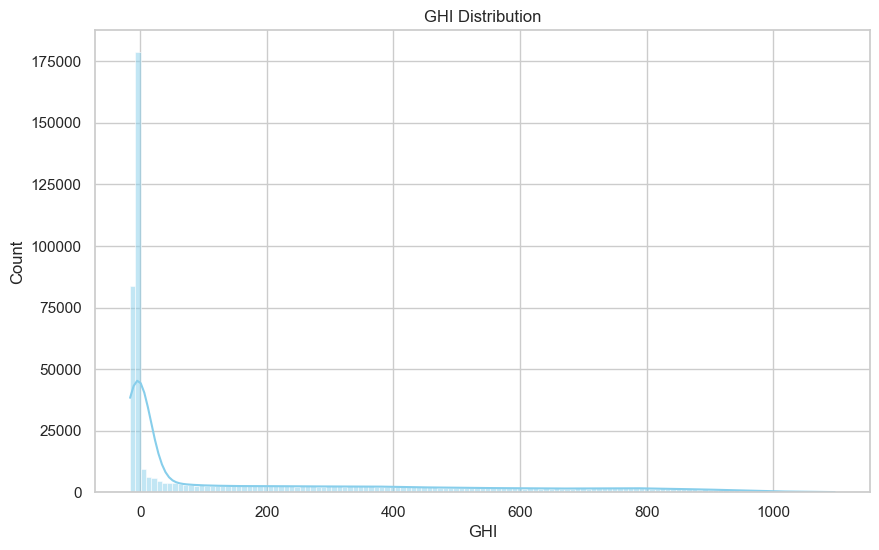

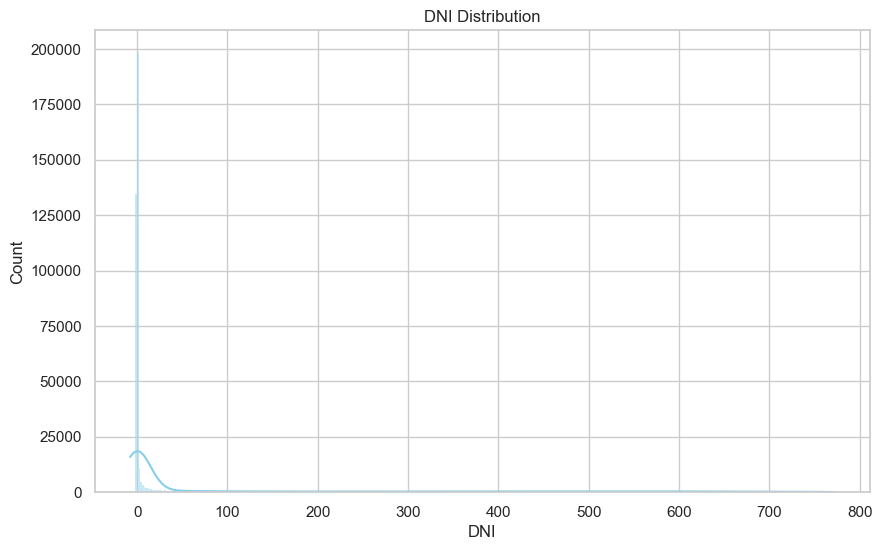

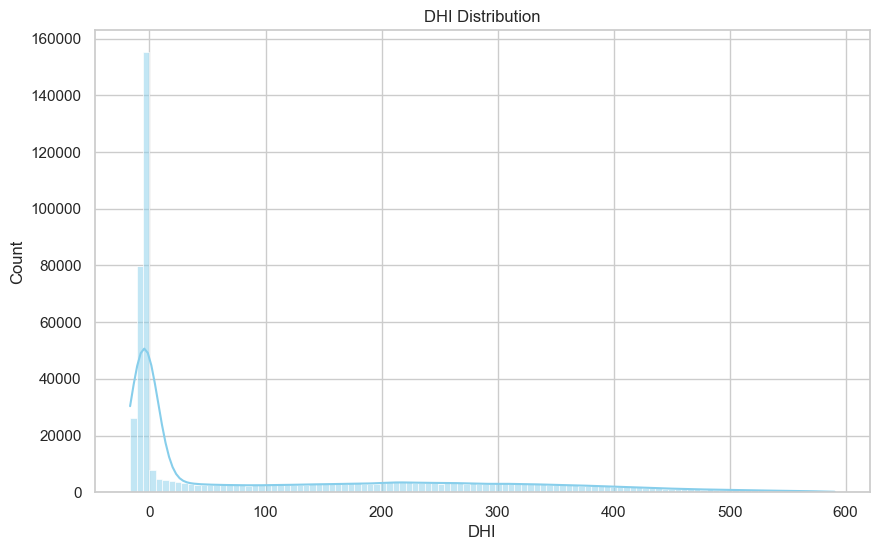

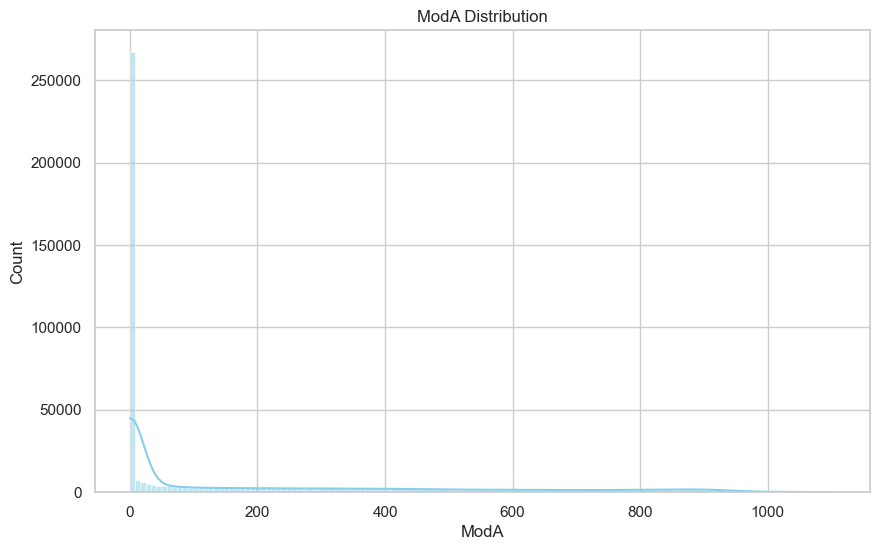

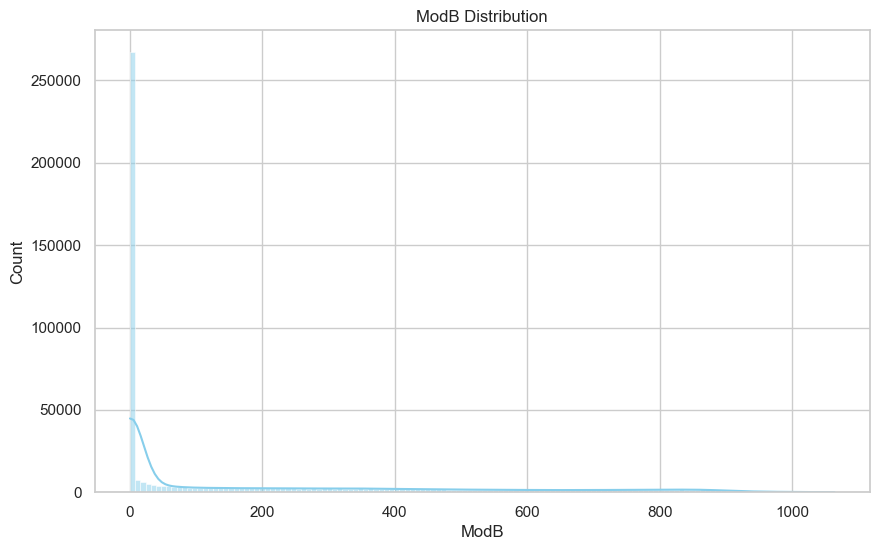

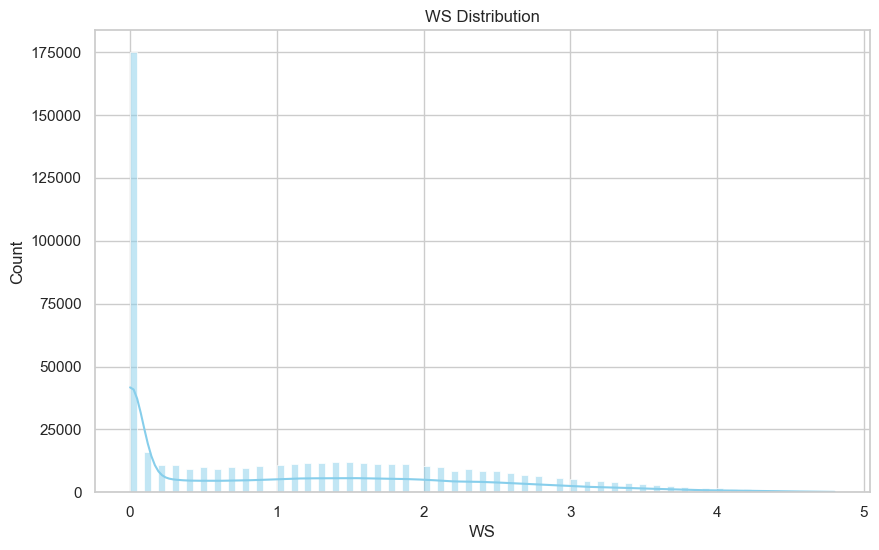

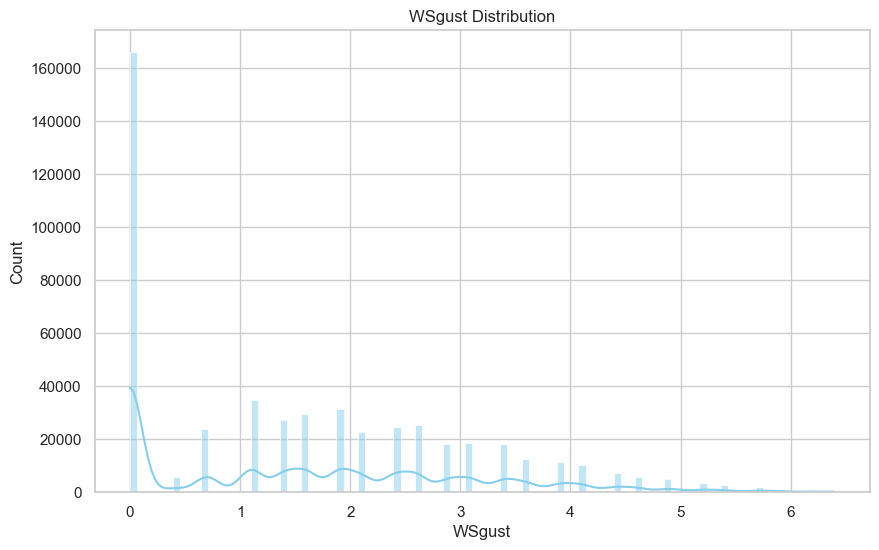

In [11]:
for col in cols:
    plt.figure()
    sns.histplot(df_clean[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.show()

In [12]:
country_name = "sieraleone"  # change this to match your dataset
output_path = f"{country_name}_clean.csv"
df_clean.to_csv(output_path, index=False)

print(f"\n✅ Cleaned dataset saved as {output_path}")


✅ Cleaned dataset saved as sieraleone_clean.csv
